# Network Intrusion Detection with Deep Learning



Menggunakan stacked AE dan DNN

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Open Data

In [0]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [0]:
my_file =  '10data2.npy'
train,test,y_train,y_test,ylabel_train, ylabel_test = load_matrices(my_file)

## The Model

In [6]:
from keras.callbacks import EarlyStopping
from keras.layers.embeddings import Embedding
from keras.layers import Input, Dense, Activation
from keras.activations import elu
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from time import time
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
from keras.callbacks import ModelCheckpoint
filepath="./logsae/2tes_b.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [12]:
from keras.layers.advanced_activations import LeakyReLU

#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'


In [13]:
# layer 1
input_dim = train.shape[1]
input_ly_1= Input(shape=(input_dim,))
enc_ly_1= Dense(70, activation=LR, kernel_initializer='lecun_uniform')(input_ly_1)
dec_ly_1=Dense(input_dim, activation='sigmoid', kernel_initializer='lecun_uniform')(enc_ly_1)

auto_ly_1= Model(input_ly_1, dec_ly_1)
encoder_ly_1= Model(input_ly_1, enc_ly_1)
auto_ly_1.summary()


t0 = time()
auto_ly_1.compile(loss='mse',optimizer='adam', metrics=['accuracy']) # reporting the loss

auto_ly_1.fit(train,train,
      epochs=20,
      batch_size=256,
      shuffle=True,
      callbacks=callbacks_list,                    
      #callbacks=[early_stopping])
      #validation_data=(test,test))
      validation_split=0)   
  
tt = time()-t0
print ("FEATURE EXTRACTION in {} seconds".format(round(tt,3)))
# if you want an encoded flatten representation of every test MNIST


ly1_predict= encoder_ly_1.predict(train)
print(ly1_predict.shape)




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                5670      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                5680      
Total params: 11,350
Trainable params: 11,350
Non-trainable params: 0
_________________________________________________________________




/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))




Epoch 1/20





1619315/1619315 [==============================] - 17s 10us/step - loss: 0.0029 - acc: 0.2710
Epoch 2/20
  10240/1619315 [..............................] - ETA: 24s - loss: 7.2933e-05 - acc: 0.3019

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1619315/1619315 [==============================] - 16s 10us/step - loss: 4.6322e-05 - acc: 0.3439
Epoch 3/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 2.6882e-05 - acc: 0.3374
Epoch 4/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 2.1418e-05 - acc: 0.3004
Epoch 5/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 1.9168e-05 - acc: 0.3634
Epoch 6/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 1.7596e-05 - acc: 0.3976
Epoch 7/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 1.6475e-05 - acc: 0.4013
Epoch 8/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 1.5729e-05 - acc: 0.4050
Epoch 9/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 1.5228e-05 - acc: 0.4045
Epoch 10/20
1619315/1619315 [==============================] - 16s 10us/step - loss: 1.4657e-05 - acc: 0.4039
Epoch 11/20
1619315/1619315 [

In [14]:
# layer 2
input_ly_2= Input(shape=(70,))
enc_ly_2= Dense(40, activation=LR, kernel_initializer='lecun_uniform')(input_ly_2)
dec_ly_2=Dense(70, activation='sigmoid', kernel_initializer='lecun_uniform')(enc_ly_2)

auto_ly_2= Model(input_ly_2, dec_ly_2)
encoder_ly_2= Model(input_ly_2, enc_ly_2)
auto_ly_2.summary()


t0 = time()
auto_ly_2.compile(loss='mse',optimizer='adam', metrics=['accuracy']) # reporting the loss

history_a=auto_ly_2.fit(ly1_predict,ly1_predict,
      epochs=20,
      batch_size=256,
      shuffle=True,
      callbacks=callbacks_list,                    
      #callbacks=[early_stopping])
      #validation_data=(test,test))
      validation_split=0)   
  
tt = time()-t0
print ("FEATURE EXTRACTION in {} seconds".format(round(tt,3)))
# if you want an encoded flatten representation of every test MNIST


ly2_predict= encoder_ly_2.predict(ly1_predict)
print(ly2_predict.shape)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 70)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2840      
_________________________________________________________________
dense_4 (Dense)              (None, 70)                2870      
Total params: 5,710
Trainable params: 5,710
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1165 - acc: 0.3107
Epoch 2/20
  14848/1619315 [..............................] - ETA: 17s - loss: 0.1104 - acc: 0.1720

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1110 - acc: 0.2022
Epoch 3/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1108 - acc: 0.3364
Epoch 4/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1107 - acc: 0.3777
Epoch 5/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1107 - acc: 0.3628
Epoch 6/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1107 - acc: 0.3579
Epoch 7/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1106 - acc: 0.4177
Epoch 8/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1104 - acc: 0.4183
Epoch 9/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1104 - acc: 0.3718
Epoch 10/20
1619315/1619315 [==============================] - 12s 7us/step - loss: 0.1104 - acc: 0.3154
Epoch 11/20
1619315/1619315 [==============================] - 12s 7us/ste

In [15]:
# layer 3
input_ly_3= Input(shape=(40,))
enc_ly_3= Dense(30, activation=LR, kernel_initializer='lecun_uniform')(input_ly_3)
dec_ly_3=Dense(40, activation='sigmoid', kernel_initializer='lecun_uniform')(enc_ly_3)

auto_ly_3= Model(input_ly_3, dec_ly_3)
encoder_ly_3= Model(input_ly_3, enc_ly_3)
auto_ly_3.summary()


t0 = time()
auto_ly_3.compile(loss='mse',optimizer='adam', metrics=['accuracy']) # reporting the loss

history_a=auto_ly_3.fit(ly2_predict,ly2_predict,
      epochs=20,
      batch_size=256,
      shuffle=True,
      callbacks=callbacks_list,                    
      #callbacks=[early_stopping])
      #validation_data=(test,test))
      validation_split=0)   
  
tt = time()-t0
print ("FEATURE EXTRACTION in {} seconds".format(round(tt,3)))
# if you want an encoded flatten representation of every test MNIST


ly3_predict= encoder_ly_3.predict(ly2_predict)
print(ly3_predict.shape)


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1240      
Total params: 2,470
Trainable params: 2,470
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.7306 - acc: 0.0199
Epoch 2/20
  26368/1619315 [..............................] - ETA: 12s - loss: 7.7667 - acc: 0.0298

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1619315/1619315 [==============================] - 9s 6us/step - loss: 7.7192 - acc: 0.0281
Epoch 3/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.7151 - acc: 0.0280
Epoch 4/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.7091 - acc: 0.0280
Epoch 5/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.6978 - acc: 0.0280
Epoch 6/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.6969 - acc: 0.0280
Epoch 7/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.6945 - acc: 0.0280
Epoch 8/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.6941 - acc: 0.0280
Epoch 9/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.6941 - acc: 0.0280
Epoch 10/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 7.6941 - acc: 0.0280
Epoch 11/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 

In [17]:
# layer 4
input_ly_4= Input(shape=(30,))
enc_ly_4= Dense(25, activation=LR, kernel_initializer='lecun_uniform')(input_ly_4)
dec_ly_4=Dense(30, activation='sigmoid', kernel_initializer='lecun_uniform')(enc_ly_4)

auto_ly_4= Model(input_ly_4, dec_ly_4)
encoder_ly_4= Model(input_ly_4, enc_ly_4)
auto_ly_4.summary()


t0 = time()
auto_ly_4.compile(loss='mse',optimizer='adam', metrics=['accuracy']) # reporting the loss

history_a=auto_ly_4.fit(ly3_predict,ly3_predict,
      epochs=20,
      batch_size=256,
      shuffle=True,
      callbacks=callbacks_list,                    
      #callbacks=[early_stopping])
      #validation_data=(test,test))
      validation_split=0)   
  
tt = time()-t0
print ("FEATURE EXTRACTION in {} seconds".format(round(tt,3)))
# if you want an encoded flatten representation of every test MNIST


ly4_predict= encoder_ly_4.predict(ly3_predict)
print(ly4_predict.shape)


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                780       
Total params: 1,555
Trainable params: 1,555
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 58.0298 - acc: 0.0196
Epoch 2/20
  17152/1619315 [..............................] - ETA: 15s - loss: 57.9083 - acc: 0.0026

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1619315/1619315 [==============================] - 9s 6us/step - loss: 58.0064 - acc: 0.0086
Epoch 3/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 57.9987 - acc: 0.0017
Epoch 4/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 57.9980 - acc: 0.0016
Epoch 5/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 57.9979 - acc: 0.0016
Epoch 6/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 57.9971 - acc: 0.0016
Epoch 7/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 57.9971 - acc: 0.0016
Epoch 8/20
1619315/1619315 [==============================] - 9s 5us/step - loss: 57.9971 - acc: 0.0016
Epoch 9/20
1619315/1619315 [==============================] - 9s 5us/step - loss: 57.9971 - acc: 0.0016
Epoch 10/20
1619315/1619315 [==============================] - 9s 6us/step - loss: 57.9971 - acc: 0.0016
Epoch 11/20
1619315/1619315 [==============================] - 9s 6us/step

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath2="./logsae/7weights_tes_2a.best.hdf5"
checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', save_best_only=True, mode='max')
callbacks_list2 = [checkpoint2]

In [19]:
###DNN
# Deep stacked auto encoder
ly_1= auto_ly_1.layers[1].get_weights()
ly_2= auto_ly_2.layers[1].get_weights()
ly_3= auto_ly_3.layers[1].get_weights()
ly_4= auto_ly_4.layers[1].get_weights()

input_da= Input(shape=(input_dim,))
dnn_1=Dense(70, activation=LR,  kernel_initializer='lecun_uniform',input_shape=(input_dim,),
            name="layer1")(input_da)
dnn_2= Dense(40, activation=LR, kernel_initializer='lecun_uniform',name="layer2")(dnn_1)
dnn_3= Dense(30, activation=LR, kernel_initializer='lecun_uniform',name="layer3")(dnn_2)
dnn_4= Dense(25, activation=LR, kernel_initializer='lecun_uniform',name="layer4")(dnn_3)
dnn_5= Dense(15, activation='softmax',kernel_initializer='lecun_uniform')(dnn_4)

dnn= Model(input_da, dnn_5)
dnn.summary()

dnn.layers[1].set_weights(ly_1) # first dense layer
dnn.layers[2].set_weights(ly_2)
dnn.layers[3].set_weights(ly_3)
dnn.layers[4].set_weights(ly_4)


#######################################

t1=time()
dnn.compile(loss='categorical_crossentropy', metrics=['accuracy'],
            optimizer= Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=0.0, amsgrad=False))
history2a=dnn.fit(train, ylabel_train,epochs=200,batch_size=256,shuffle=True,verbose=1, 
                    callbacks=callbacks_list2, 
                      validation_split=0)
                     #validation_data=(test,y_test))
tt2 = time()-t1
print ("FEATURE CLASSIFICATION in {} seconds".format(round(tt2,3)))






/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 80)                0         
_________________________________________________________________
layer1 (Dense)               (None, 70)                5670      
_________________________________________________________________
layer2 (Dense)               (None, 40)                2840      
_________________________________________________________________
layer3 (Dense)               (None, 30)                1230      
_________________________________________________________________
layer4 (Dense)               (None, 25)                775       
_________________________________________________________________
dense_11 (Dense)             (None, 15)                390       
Total params: 10,905
Trainable params: 10,905
Non-trainable params: 0
______________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1619315/1619315 [==============================] - 17s 11us/step - loss: 0.1575 - acc: 0.9505
Epoch 3/200
1619315/1619315 [==============================] - 17s 11us/step - loss: 0.1436 - acc: 0.9521
Epoch 4/200
1619315/1619315 [==============================] - 17s 10us/step - loss: 0.1366 - acc: 0.9530
Epoch 5/200
1619315/1619315 [==============================] - 17s 11us/step - loss: 0.1348 - acc: 0.9535
Epoch 6/200
1619315/1619315 [==============================] - 17s 10us/step - loss: 0.1337 - acc: 0.9540
Epoch 7/200
1619315/1619315 [==============================] - 17s 10us/step - loss: 0.1329 - acc: 0.9542
Epoch 8/200
1619315/1619315 [==============================] - 17s 10us/step - loss: 0.1321 - acc: 0.9544
Epoch 9/200
1619315/1619315 [==============================] - 17s 10us/step - loss: 0.1315 - acc: 0.9546
Epoch 10/200
1619315/1619315 [==============================] - 17s 10us/step - loss: 0.1311 - acc: 0.9548
Epoch 11/200
1619315/1619315 [===========================

In [47]:
import joblib
# save the model to disk
filename = 'sae_dnn_model.sav'
joblib.dump(dnn, filename)

['sae_dnn_model.sav']

# New Section

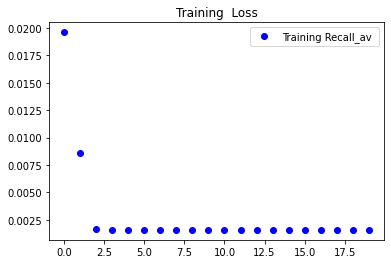

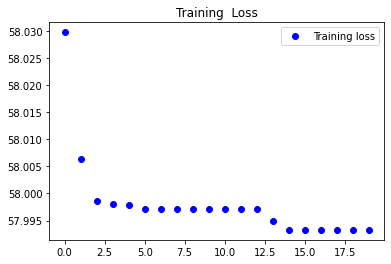

In [23]:
import matplotlib.pyplot as plt

accuracy_a = history_a.history['acc']
#val_accuracy_a = history_a.history['val_acc']
loss_a = history_a.history['loss']
#val_loss_a = history_a.history['val_loss']
epochs = range(len(accuracy_a))
plt.plot(epochs, accuracy_a, 'bo', label='Training Recall_av ')
#plt.plot(epochs, val_accuracy_a, 'b', label='Test Recall_av')
plt.title('Training  Loss')
plt.legend()
plt.figure()
plt.plot(epochs, loss_a, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_a, 'b', label='Test loss')
plt.title('Training  Loss')
plt.legend()
plt.show()

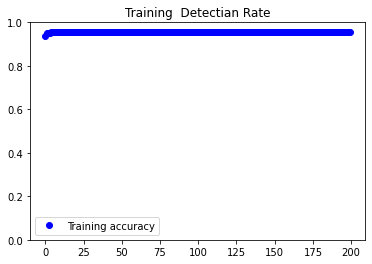

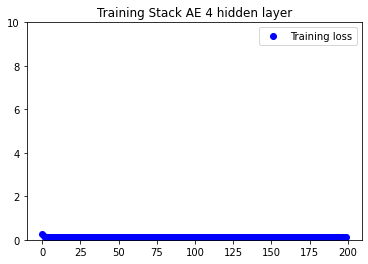

In [26]:
accuracy_2a = history2a.history['acc']
#val_accuracy_2a = history2a.history['val_accuracy']
loss_2a = history2a.history['loss']
#val_loss_2a = history2a.history['val_loss']
epochs = range(len(accuracy_2a))
plt.plot(epochs, accuracy_2a, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy_2a, 'b', label='Test accuracy')
plt.ylim(bottom=0, top=1.0)  # this line
plt.title('Training  Detectian Rate')
plt.legend()
plt.figure()
plt.plot(epochs, loss_2a, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_2a, 'b', label='Test loss')
plt.ylim(bottom=0, top=10.0)  # this line
plt.title('Training Stack AE 4 hidden layer')
plt.legend()
plt.show()

In [27]:
dnn.evaluate(test,ylabel_test)

404836/404836 [==============================] - 10s 25us/step


[0.1204456508450359, 0.9576766888320208]

In [29]:
# 4. evaluate the network
loss, val_accuracy = dnn.evaluate(train,ylabel_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, val_accuracy*100))

1619315/1619315 [==============================] - 36s 22us/step

Loss: 0.12, Accuracy: 95.76%


In [28]:
# 4. evaluate the network
loss, val_accuracy = dnn.evaluate(test,ylabel_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, val_accuracy*100))

404836/404836 [==============================] - 9s 21us/step

Loss: 0.12, Accuracy: 95.77%


## The Performance

In [0]:
from sklearn.metrics import confusion_matrix


In [30]:
scores = dnn.evaluate(test, ylabel_test, verbose=0)
print("%s: %.2f%%" % (dnn.metrics_names[1], scores[1]*100))



acc: 95.77%


In [0]:
preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_train, axis=1)
# With the confusion matrix, we can aggregate model predictions
# This helps to understand the mistakes and refine the model

In [0]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix


In [35]:
confusion_matrix(true_lbls, pred_lbls)

array([[799224,     24,      5,      0,      3,      0,     29,      4,
             1,      1,     14,      0,   3714,      0,      6],
       [    18,  85824,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [   132,      0,    314,     28,      0,      0,     20,      0,
             0,      1,      1,      0,      0,      0,      0],
       [     8,      0,     39,    130,      0,      0,     10,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0, 192098,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,   1311,     51,      0,
             0,      0,      0,      0,      0,      0,      0],
       [    29,      0,      0,      0,      0,    127, 161291,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,  

In [36]:
from sklearn.metrics import f1_score
f1_score(true_lbls, pred_lbls, average='weighted')

0.9504007126846628

In [0]:
# Overall, we report similar model performance to the reference above.
# Their research suggest using unsupervised pretraining with autoencoders over
# both train and test before adding classifier layers for fine-tuning.
# I have done no parameter tuning but report comparable performance.
# Note the model has diffuculty with U2R and R2L.

In [39]:
from sklearn.metrics import classification_report
outcomes = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
'DDOS attack-HOIC','DDOS attack-LOIC-UDP','DDoS attacks-LOIC-HTTP',
'DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-SlowHTTPTest','DoS attacks-Slowloris',
'FTP-BruteForce','Infilteration','SQL Injection','SSH-Bruteforce' ]
class_names=outcomes

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))


                          precision    recall  f1-score   support

                  Benign    0.95522   0.99527   0.97483    803025
                     Bot    0.99972   0.99979   0.99976     85842
        Brute Force -Web    0.82415   0.63306   0.71608       496
        Brute Force -XSS    0.79755   0.69519   0.74286       187
        DDOS attack-HOIC    0.99998   1.00000   0.99999    192098
    DDOS attack-LOIC-UDP    0.91168   0.96256   0.93643      1362
  DDoS attacks-LOIC-HTTP    0.99930   0.99903   0.99917    161447
   DoS attacks-GoldenEye    0.99968   0.99972   0.99970     25008
        DoS attacks-Hulk    0.99994   0.99999   0.99996    138459
DoS attacks-SlowHTTPTest    0.76101   0.51677   0.61555     41974
   DoS attacks-Slowloris    0.99740   0.98820   0.99278      6612
          FTP-BruteForce    0.71635   0.88273   0.79089     58055
           Infilteration    0.75003   0.23050   0.35263     48347
           SQL Injection    0.97059   0.46479   0.62857        71
         

In [40]:
class_names

['Benign',
 'Bot',
 'Brute Force -Web',
 'Brute Force -XSS',
 'DDOS attack-HOIC',
 'DDOS attack-LOIC-UDP',
 'DDoS attacks-LOIC-HTTP',
 'DoS attacks-GoldenEye',
 'DoS attacks-Hulk',
 'DoS attacks-SlowHTTPTest',
 'DoS attacks-Slowloris',
 'FTP-BruteForce',
 'Infilteration',
 'SQL Injection',
 'SSH-Bruteforce']

Confusion matrix, without normalization
[[799224     24      5      0      3      0     29      4      1      1
      14      0   3714      0      6]
 [    18  85824      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   132      0    314     28      0      0     20      0      0      1
       1      0      0      0      0]
 [     8      0     39    130      0      0     10      0      0      0
       0      0      0      0      0]
 [     0      0      0      0 192098      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0   1311     51      0      0      0
       0      0      0      0      0]
 [    29      0      0      0      0    127 161291      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0  25001      6      0
       1      0      0      0      0]
 [     0      0      0      0      0      0      0      2 138457      0
       0

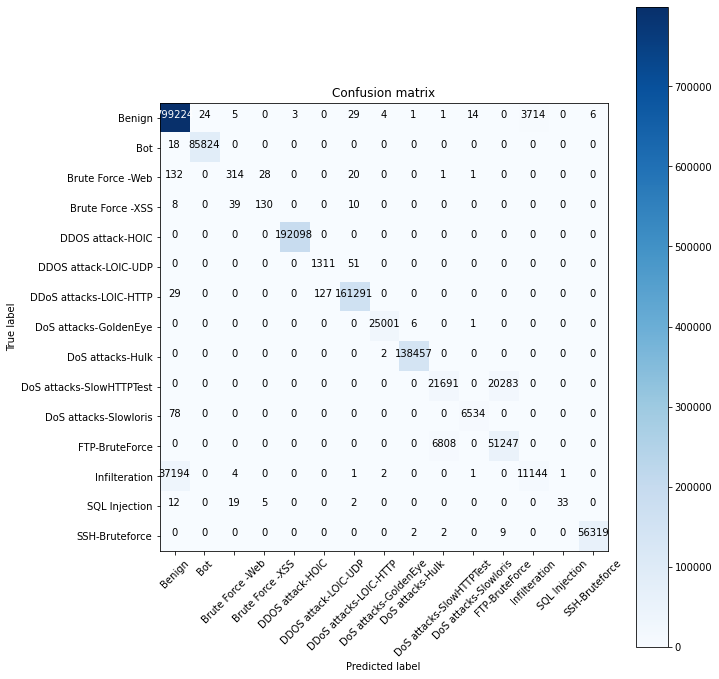

In [41]:

#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes


results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

# Data Test

In [0]:
preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_test, axis=1)
# With the confusion matrix, we can aggregate model predictions
# This helps to understand the mistakes and refine the model

In [43]:
scores = dnn.evaluate(test, ylabel_test, verbose=0)
print("%s: %.2f%%" % (dnn.metrics_names[1], scores[1]*100))

acc: 95.77%


In [0]:
preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_test, axis=1)
# With the confusion matrix, we can aggregate model predictions
# This helps to understand the mistakes and refine the model

In [0]:
confusion_matrix(true_lbls, pred_lbls)

In [45]:

class_names=outcomes

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

                          precision    recall  f1-score   support

                  Benign    0.95589   0.99474   0.97493    201238
                     Bot    0.99963   0.99967   0.99965     21479
        Brute Force -Web    0.79518   0.57391   0.66667       115
        Brute Force -XSS    0.71111   0.74419   0.72727        43
        DDOS attack-HOIC    1.00000   1.00000   1.00000     48006
    DDOS attack-LOIC-UDP    0.87970   0.95380   0.91525       368
  DDoS attacks-LOIC-HTTP    0.99923   0.99848   0.99886     40219
   DoS attacks-GoldenEye    0.99951   0.99967   0.99959      6123
        DoS attacks-Hulk    0.99988   0.99997   0.99993     34758
DoS attacks-SlowHTTPTest    0.76159   0.52013   0.61811     10484
   DoS attacks-Slowloris    0.99385   0.99141   0.99263      1630
          FTP-BruteForce    0.71697   0.88202   0.79098     14452
           Infilteration    0.72754   0.22948   0.34891     11892
           SQL Injection    0.85714   0.37500   0.52174        16
         

Confusion matrix, without normalization
[[200179      8      3      1      0      0     10      1      2      0
      10      0   1022      1      1]
 [     7  21472      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [    36      0     66     10      0      0      3      0      0      0
       0      0      0      0      0]
 [     0      0     10     32      0      0      1      0      0      0
       0      0      0      0      0]
 [     0      0      0      0  48006      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      1      0    351     16      0      0      0
       0      0      0      0      0]
 [    13      0      0      0      0     48  40158      0      0      0
       0      0      0      0      0]
 [     1      0      0      0      0      0      0   6121      1      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0      1  34757      0
       0

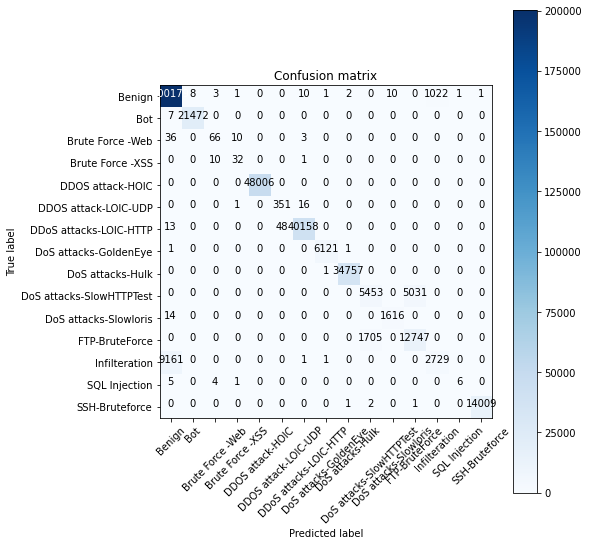

In [46]:



results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))